In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/Colab Notebooks'


In [3]:

import keras
import cv2
import matplotlib.pyplot as plt


In [48]:
import numpy as np
CATEGORIES = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy',
 'Potato___Early_blight' ,'Potato___Late_blight', 'Potato___healthy',
 'Tomato_Bacterial_spot' ,'Tomato_Early_blight', 'Tomato_Late_blight',
 'Tomato_Leaf_Mold' ,'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite' ,'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

def image(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img,(100, 100))
    new_arr = np.array(new_arr/255)
    new_arr = new_arr.reshape(-1, 100, 100, 3)
    return new_arr

model = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/savedmodel.h5')

In [49]:
prediction = model.predict(image('/content/gdrive/MyDrive/Colab Notebooks/plant_folder/plantvillage/Potato___healthy/00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG'))

print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 383ms/step
Potato___healthy


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import hsv_to_rgb


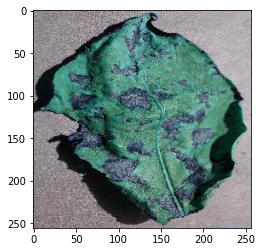

In [31]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/plant_folder/plantvillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')
plt.imshow(img)
plt.show()


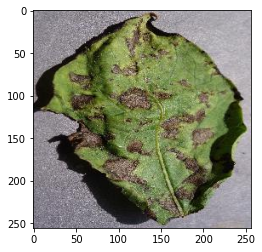

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

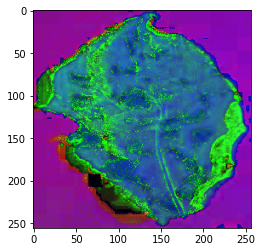

In [33]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

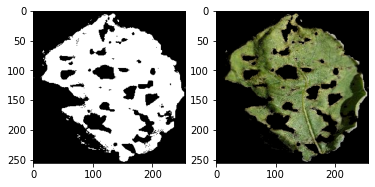

In [34]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
mask = cv2.inRange(hsv_img, lower_green, upper_green)
result = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

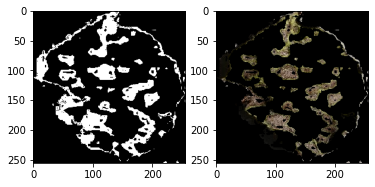

In [35]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
disease_result = cv2.bitwise_and(img, img, mask=disease_mask)
plt.subplot(1, 2, 1)
plt.imshow(disease_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(disease_result)
plt.show()


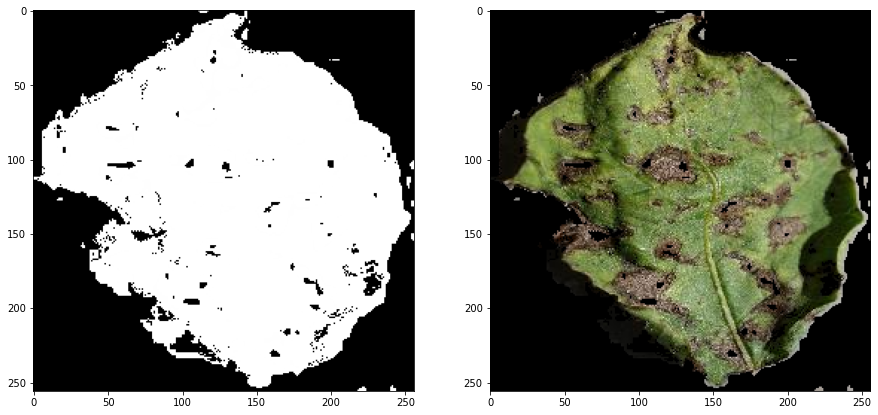

In [36]:
final_mask = mask + disease_mask
final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


     


In [37]:

surf = cv2.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(final_result,None)
len(kp)


error: ignored

In [38]:

print(kp)

NameError: ignored

In [ ]:
print(des)


In [ ]:

img2 = cv2.drawKeypoints(final_result,kp,None,(255,0,0),4)


In [ ]:

plt.imshow(final_result)

In [ ]:

# global Feature
global_feature = des

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)


In [ ]:

global_feature.shape


In [ ]:
surf.descriptorSize()

In [ ]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))

In [ ]:

a = global_feature
np.savetxt("doo.csv", a, delimiter=",")